In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
file=pd.read_csv("titanic.csv")

file=file.dropna()
#Encoding
encode = ['Name','Sex', 'Ticket', 'Cabin', 'Embarked']
for i in encode:
    file[i + '_LabelEncoded'] = file[i].astype('category').cat.codes
file = pd.get_dummies(file, columns=encode, prefix=encode)
#Normilization
scaler = MinMaxScaler()
column_with_numbers = file.select_dtypes(include=['int64', 'float64']).columns
file[column_with_numbers] = scaler.fit_transform(file[column_with_numbers])#to all columns


Epoch 1/5


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8298 - loss: 0.0489  
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.0507 
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8467 - loss: 0.0409 
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8064 - loss: 0.0461
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8249 - loss: 0.0392 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8398 - loss: 0.0343 
Accuracy: 83.7837815284729


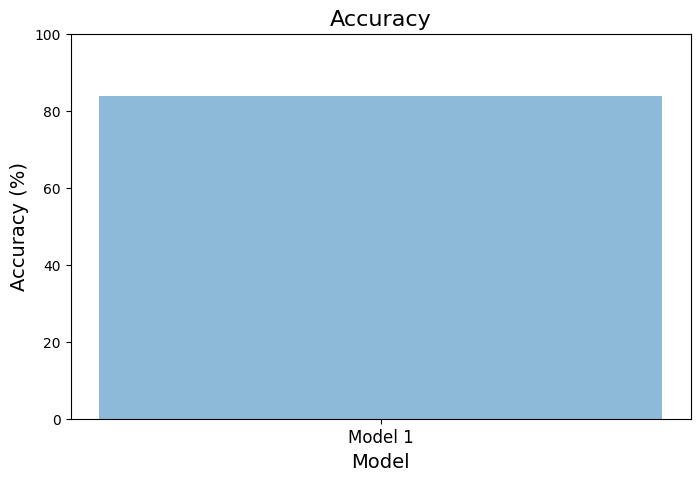

In [37]:
import matplotlib.pyplot as plt
# Separate features and target variable
y = file[['Age', 'Parch']]  # Output variables
X = file.drop([ 'Age', 'Parch'], axis=1)  # Input features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% test size, remaining training set

# Model
model = Sequential()
model.add(Dense(4, input_dim=X_train.shape[1], activation='sigmoid'))  # Hidden layer with 4 units
model.add(Dense(2, activation='sigmoid'))  # Output layer with 2 units

# Compile the model
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=20)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy * 100)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar([1], [accuracy * 100], align='center', alpha=0.5)  # assuming only one model
plt.xticks([1], ['Model 1'], fontsize=12)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Accuracy', fontsize=16)
plt.ylim(0, 100)
plt.show()